# Figure 3 - Discriminability Results

Discriminability values from each applicable diffusion (left) and functional (right) MRI dataset. Relative row height denotes the relative size of the dataset. Rows, each representing a different parcellation, are organized from top to bottom by highest to lowest mean discriminability value. The mean discriminability value for each parcellation is displayed in the last column of both plots. The number of subjects/sessions is displayed next to the datasets' names in brackets and the number of ROI's in a given parcellation are shown in brackets if not mentioned in the parcellation name. Discriminability values for the structural connectomes was greater than 0.7 for the 32 of the 35 parcellations, while being robust to the number of scans per subject. Functional connectomes rarely had discriminability values lower than 0.7.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl


def make_y_yticks(dsizes):
    """Helper function for making y and yticks for the plot"""

    i = 0
    q = [0]
    qq = []
    for idx, st in enumerate(dsizes):
        q.append(st + i)
        if idx == 0:
            qq.append(0.5 * st)
        else:
            qq.append(sum(dsizes[:idx]) + (0.5 * st))
        i = i + st
    y = np.array(q)
    yticks = np.array(qq)

    return y, yticks

/var/folders/hs/y8jx5sr97_x5rzsz94_4_qx00000gn/T/ipykernel_57959/3181599882.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['0.4', 'Random', '0.6', '0.7', '0.8', '0.9', 'Optimal'], fontsize=11)


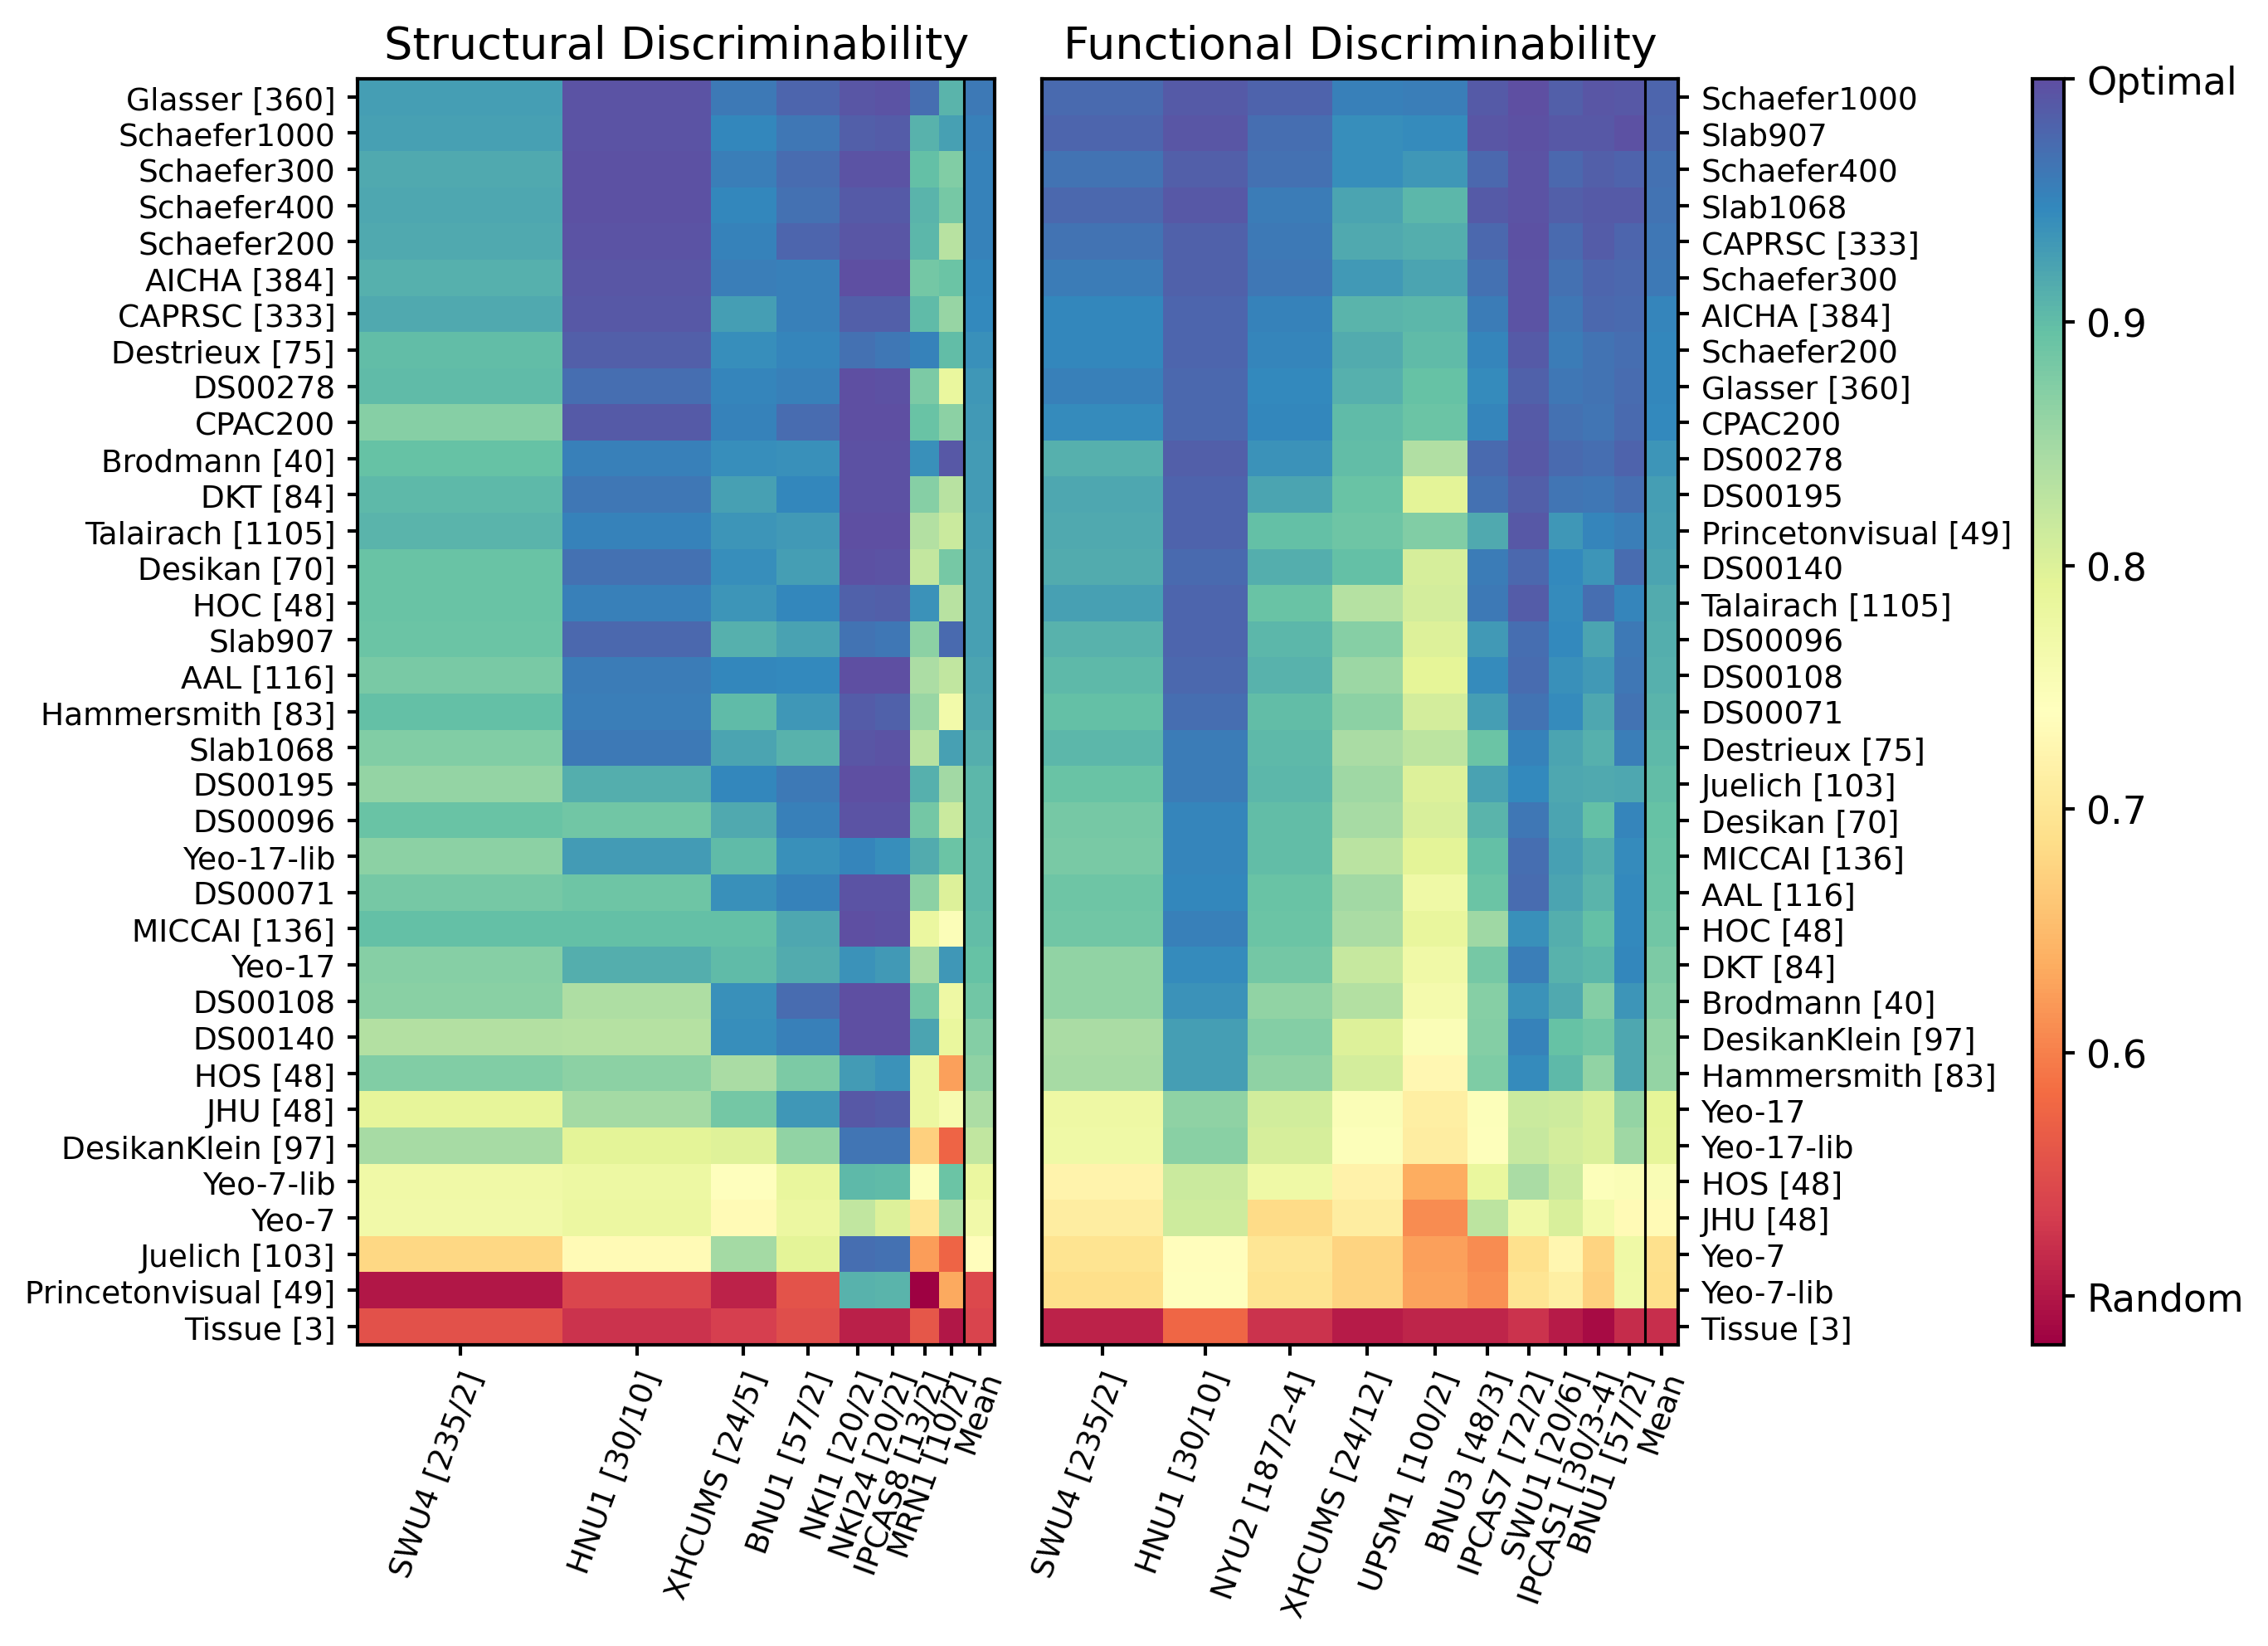

In [2]:
# Set up the plot
sns.set_context("paper", font_scale=1)
rotation = 70
vmin = 0.48
vmax = 1

fig, ax = plt.subplots(
    ncols=3,
    figsize=(9, 6.5),
    dpi=300,
    gridspec_kw={"width_ratios": [1, 1, 0.05]},
    constrained_layout=True,
)

# Diffusion side
df = pd.read_csv("./data/diffusion_disc.csv", index_col=0)

func_datasets = df.columns.to_list()
dsizes = df.loc["dsizes"].to_list()
func_atlases = df.index.to_list()[:-1]
tot = int(sum(dsizes))
Z = df.loc[func_atlases].values
x = np.arange(0, 72, 2)  # 36)
y, yticks = make_y_yticks(dsizes)
X, Y = np.meshgrid(y, x)

im = ax[0].pcolormesh(X, Y, Z[::-1], cmap="Spectral", vmin=vmin, vmax=vmax)  #'jet_r')

ax[0].axvline(x=60, color="k", linestyle="-", lw=0.75)
ax[0].set_yticks(np.arange(1, len(func_atlases) * 2 + 1, 2))
ax[0].set_xticks(np.array(yticks))
ax[0].set_yticklabels(np.array(func_atlases)[::-1], fontsize=9)
ax[0].set_xticklabels(np.array(func_datasets), fontsize=9)
ax[0].tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
plt.setp(ax[0].get_xticklabels(), rotation=rotation, ha="right", rotation_mode="anchor")
ax[0].invert_xaxis()
fig.colorbar(im, cax=ax[2])

# Functional side
df = pd.read_csv("./data/functional_disc.csv", index_col=0)

func_datasets = df.columns.to_list()
dsizes = df.loc["dsizes"].to_list()
func_atlases = df.index.to_list()[:-1]
tot = int(sum(dsizes))
Z = df.loc[func_atlases].values
y, yticks = make_y_yticks(dsizes)
X, Y = np.meshgrid(y, x)

ax[1].pcolormesh(X, Y, Z[::-1], cmap="Spectral", vmin=vmin, vmax=vmax)  #'jet_r')
ax[1].axvline(x=120, color="k", linestyle="-", lw=0.75)
ax[1].set_yticks(np.arange(1, len(func_atlases) * 2 + 1, 2))
ax[1].set_xticks(np.array(yticks))
ax[1].set_yticklabels(np.array(func_atlases)[::-1], fontsize=9)
ax[1].set_xticklabels(np.array(func_datasets), fontsize=9)
ax[1].tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].invert_xaxis()
plt.setp(ax[1].get_xticklabels(), rotation=rotation, ha="right", rotation_mode="anchor")

ax[0].set_title("Structural Discriminability", fontsize=13)
ax[1].set_title("Functional Discriminability", fontsize=13)

ax[2].set_yticklabels(
    ["0.4", "Random", "0.6", "0.7", "0.8", "0.9", "Optimal"], fontsize=11
)

dx = 15 / 300.0
dy = 0 / 300.0
offset = mpl.transforms.ScaledTranslation(-dx, dy, fig.dpi_scale_trans)
# apply offset transform to all x ticklabels.
for axes in [ax[0], ax[1]]:
    for label in axes.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

for axes in ax:
    length = 3
    axes.xaxis.set_tick_params(length=length, width=1)
    axes.yaxis.set_tick_params(length=length, width=1)

fig.savefig("./figures/figure3.pdf", dpi=300, bbox_inches="tight")
fig.savefig("./figures/figure3.png", dpi=300, bbox_inches="tight")